In [86]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing the file as df
df = pd.read_csv('C:/Users/England/Desktop/jupyter/product_sales.csv')


In [87]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [89]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [90]:
#replace missing values in the revenue column with median revenue
df['revenue'] = df.revenue.fillna(df['revenue'].median())

In [91]:
# To print the unique values in each column and its count
columns = df.columns
for col in columns:
    unique_values = df[col].unique()
    num_of_unique_values = df[col].nunique()
    print(f"Unique values in {col}:")
    print(unique_values)
    print(num_of_unique_values)
    print('______________________________________')

Unique values in week:
[2 6 5 4 3 1]
6
______________________________________
Unique values in sales_method:
['Email' 'Email + Call' 'Call' 'em + call' 'email']
5
______________________________________
Unique values in customer_id:
['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']
15000
______________________________________
Unique values in nb_sold:
[10 15 11  9 13  8 12  7 14 16]
10
______________________________________
Unique values in revenue:
[ 89.5  225.47  52.55 ...  44.34  45.01  64.9 ]
6743
______________________________________
Unique values in years_as_customer:
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]
42
______________________________________
Unique values in nb_site_visits:
[24 28 26 25 22 31 2

In [92]:
#Cleaning sales_method column to correct misspelt values
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})


In [93]:
# Filter the dataframe to find outliers in the 'years_as_customer' column...with years greater than (2024-1984)
years_as_customer_outliers = df[df['years_as_customer'] > 40]

# Print the outliers in the years_as_customer column
display(years_as_customer_outliers)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [94]:
#To remove rows with outliers
df = df.drop(years_as_customer_outliers.index)

In [95]:
# Check for duplicated rows
duplicates = df.duplicated()

# To count the total number of duplicates
total_duplicates = duplicates.sum()

# Print the total number of duplicate rows
print(f"Total duplicates is {total_duplicates}")
print("\n")

# Select numeric columns in the dataframe
numeric_cols = df.select_dtypes(include=[int, float])

# Check if the numeric columns contain negative values
contains_negative = (numeric_cols < 0).any().any()
print(f"Contains negative values: {contains_negative}")

Total duplicates is 0


Contains negative values: False


In [96]:
#display information about the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


In [97]:
#Ensure there is no missing value in the dataset
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [98]:
#Exploring the revenue column grouped by sales approach
df.groupby('sales_method')['revenue'].agg(['mean', 'max', 'min']).round(2)

,mean,max,min
sales_method,,,
Call,49.13,89.50,32.54
Email,96.57,148.97,78.83
Email + Call,170.88,238.32,89.50


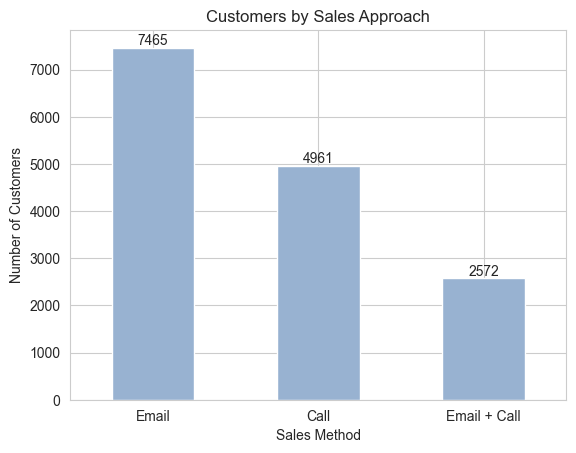

In [99]:
#Barchart of number of customers for Each Sales Approach
sns.set_style('whitegrid')
ax = df.sales_method.value_counts().plot(kind="bar", color= '#98b2d1')
sns.set_style('whitegrid')
ax.set_title("Customers by Sales Approach")
ax.set_xlabel("Sales Method")
ax.set_ylabel("Number of Customers")
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=10)
plt.xticks(rotation=0)
plt.show()

plt.show()

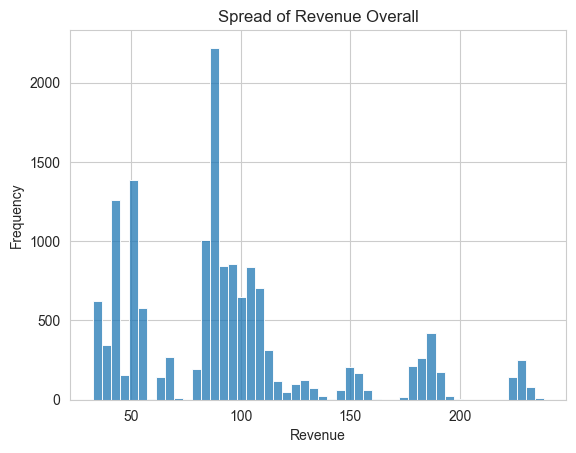

In [100]:
#Histogram showing Differences in revenue overall 
sns.histplot(data = df, x = 'revenue', bins = 50)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Spread of Revenue Overall')
plt.show()

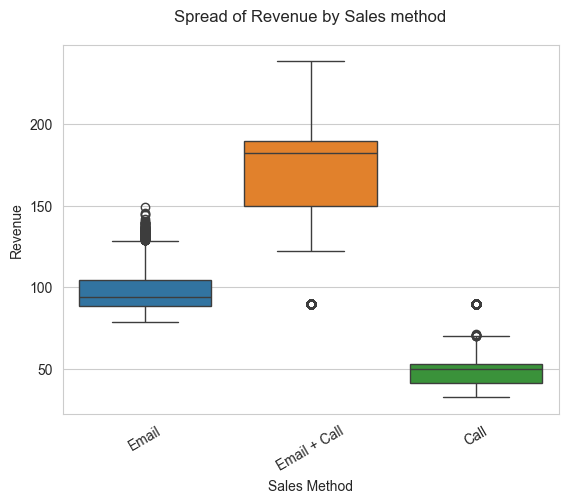

In [101]:
# Boxplot showing distribution in revenue for each sales method approach
g = sns.boxplot(x = 'sales_method', y = 'revenue', data =df, hue = 'sales_method')
g.set_title('Spread of Revenue by Sales method', y =1.04)
plt.xlabel('Sales Method')
plt.xticks(rotation = 30)
plt.ylabel('Revenue')
plt.show()

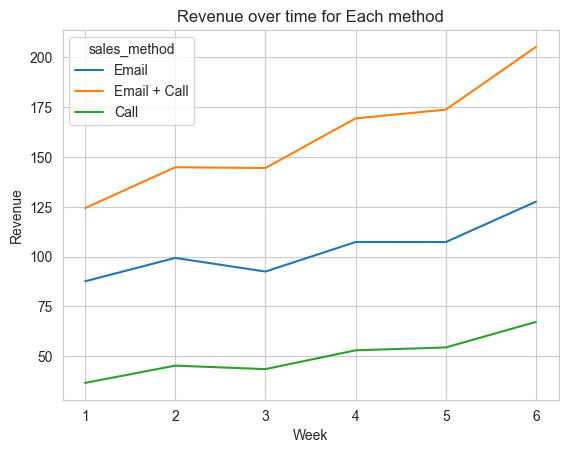

In [102]:
# Line plot of average revenue in each week
sns.lineplot(x = 'week', y ='revenue', hue = 'sales_method', data = df, errorbar= None)
plt.title('Revenue over time for Each method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

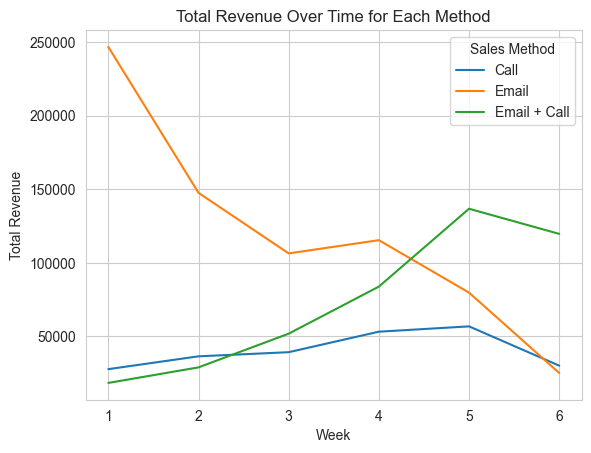

In [103]:
revenue_by_week = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Line plot of total revenue in each week
sns.lineplot(x='week', y='revenue', hue='sales_method', data=revenue_by_week, errorbar =None)
plt.title('Total Revenue Over Time for Each Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Method')
plt.show()

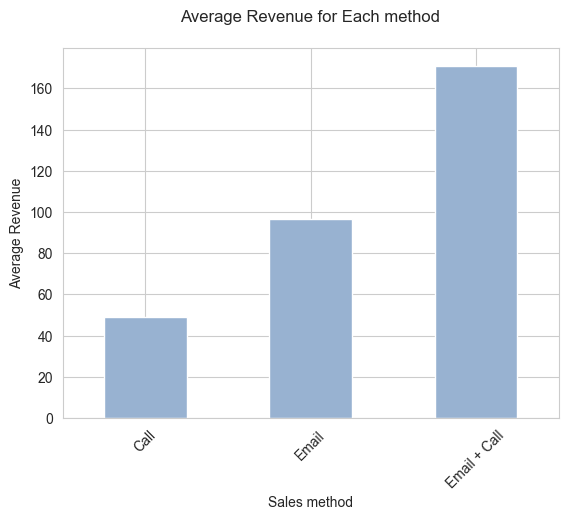

In [104]:
df_avg= df.groupby('sales_method')['revenue'].mean()
g= df_avg.plot(kind = 'bar', color= '#98b2d1')
g.set_title('Average Revenue for Each method', y= 1.05)
plt.xlabel('Sales method')
plt.xticks(rotation = 45)
plt.ylabel('Average Revenue')
plt.show()

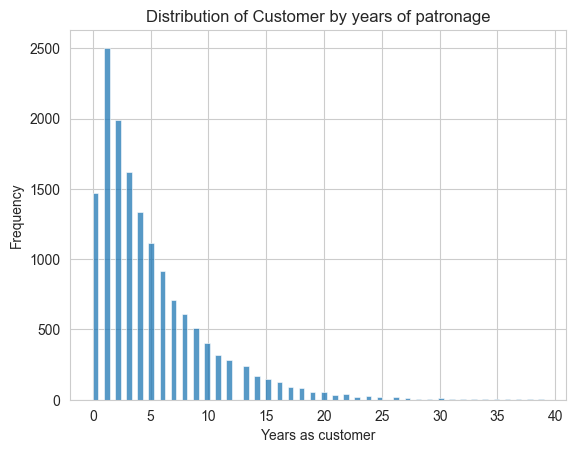

In [107]:
#Histogram showing Differences in revenue overall 
sns.histplot(data = df, x = 'years_as_customer')
plt.xlabel('Years as customer')
plt.ylabel('Frequency')
plt.title('Distribution of Customer by years of patronage')
plt.show()